In [41]:
import pandas as pd
import numpy as np
from kmeans import KMeansClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
sns.set_style('whitegrid')

In [42]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [75]:
def loadDataset():
    """
    加载数据集(DataFrame格式),并转换成所需要的格式。
    最后将返回为一个numpy的数组类型
    """
    filename = "house.xls"
    house = pd.read_excel(filename)
    
    #合并经纬度数据
    df_latlng = pd.read_csv("latlng.csv",skiprows=[0],names=["did","communityName","id","lat","lng"])
    del df_latlng['did']
    df_merge=pd.merge(df_latlng, house, left_on='communityName', right_index=True)
    del df_merge['communityName']
    del df_merge['id']

    #选取所需要的数据
    data_cluster = df_merge[["totalprice","unitprice","size","lat","lng"]]
    data_cluster = data_cluster.loc[data_cluster["size"] < 300]
    data_cluster = data_cluster.loc[data_cluster["totalprice"] < 3000]
    data_cluster = data_cluster.loc[data_cluster["unitprice"] < 150000]

    #转换为numpy数组类型
    arr_cluster = np.array(data_cluster).astype(np.float)
    return arr_cluster

In [76]:
"""1、加载数据"""
data_X = loadDataset()
data_X[:1]

array([[9.20000000e+02, 7.71880000e+04, 1.19190000e+02, 2.25642288e+01,
        1.13894029e+02]])

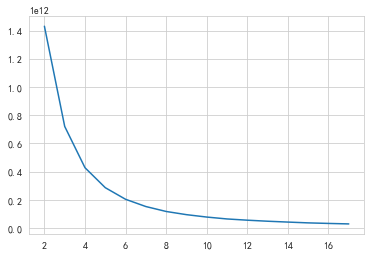

In [77]:
"""2、根据sse值，选取合适的k值"""
k_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
SSE = []
for k in k_values:
    estimator = KMeans(n_clusters=k, random_state=9)
    estimator.fit(data_X)
    SSE.append(estimator.inertia_)
plt.plot(k_values,SSE)
plt.savefig('聚类SSE.png', dpi=300)

* 去除异常值: totalprice>3000, unitprice>150000, size>300

In [78]:
# 还原数据集
filename = "house.xls"
house = pd.read_excel(filename)
    
#合并经纬度数据
df_latlng = pd.read_csv("latlng.csv",skiprows=[0],names=["did","communityName","id","lat","lng"])
del df_latlng['did']
data_cluster=pd.merge(df_latlng, house, left_on='communityName', right_index=True)
del data_cluster['communityName']
del data_cluster['id']

#选取所需要的数据
data_cluster = data_cluster.loc[data_cluster["size"] < 300]
data_cluster = data_cluster.loc[data_cluster["totalprice"] < 3000]
data_cluster = data_cluster.loc[data_cluster["unitprice"] < 150000]
data_cluster.head()

,lat,lng,totalprice,unitprice,position,rooms,size,orientation,decoration,elevator,area,height,year,buildtype,follow,city
0,22.564229,113.894029,920.0,77188,天悦龙庭二期,3室2厅,119.19,西南,精装,有电梯,宝安中心,中,2005,塔楼,13,宝安
1,22.586557,113.875490,340.0,51909,大益广场,2室2厅,65.50,西南,精装,有电梯,西乡,低,2002,板塔结合,160,宝安
2,22.584424,113.862423,660.0,73884,中熙香缇湾,4室2厅,89.33,西南,精装,有电梯,西乡,中,2009,板塔结合,226,宝安
3,22.564320,113.881130,1150.0,76657,深业新岸线三期,4室1厅,150.02,东南,精装,有电梯,宝安中心,中,2008,塔楼,29,宝安
4,22.573975,113.863933,570.0,52127,碧海富通城一期,3室2厅,109.35,南,精装,有电梯,碧海,中,2006,板塔结合,54,宝安


In [79]:
k = 5
estimator = KMeans(n_clusters=k, random_state=9)
y_pred = estimator.fit_predict(data_X)
estimator.cluster_centers_
house_cluster = []
for i in range(k):
    house_cluster.append(data_cluster[y_pred == i])

In [94]:
house_cluster[0].mean()

lat              22.543056
lng             113.996329
totalprice      972.741710
unitprice     88928.819372
size            108.954599
year           2005.068063
follow           26.977312
dtype: float64

In [95]:
house_cluster[1].mean()

lat              22.574745
lng             114.059552
totalprice      457.262115
unitprice     54967.172205
size             83.174344
year           2003.911178
follow           37.299698
dtype: float64

In [96]:
house_cluster[2].mean()

lat               22.534223
lng              113.982995
totalprice      1579.308311
unitprice     120239.908847
size             131.526327
year            2006.504021
follow            18.747989
dtype: float64

In [97]:
house_cluster[3].mean()

lat              22.556155
lng             114.017445
totalprice      608.019557
unitprice     69708.851989
size             87.039541
year           2004.483805
follow           34.763018
dtype: float64

In [98]:
house_cluster[4].mean()

lat              22.613951
lng             114.134064
totalprice      350.092623
unitprice     41300.948359
size             85.017466
year           2003.355957
follow           47.301734
dtype: float64

Text(0,0.5,'单价(元/㎡)')

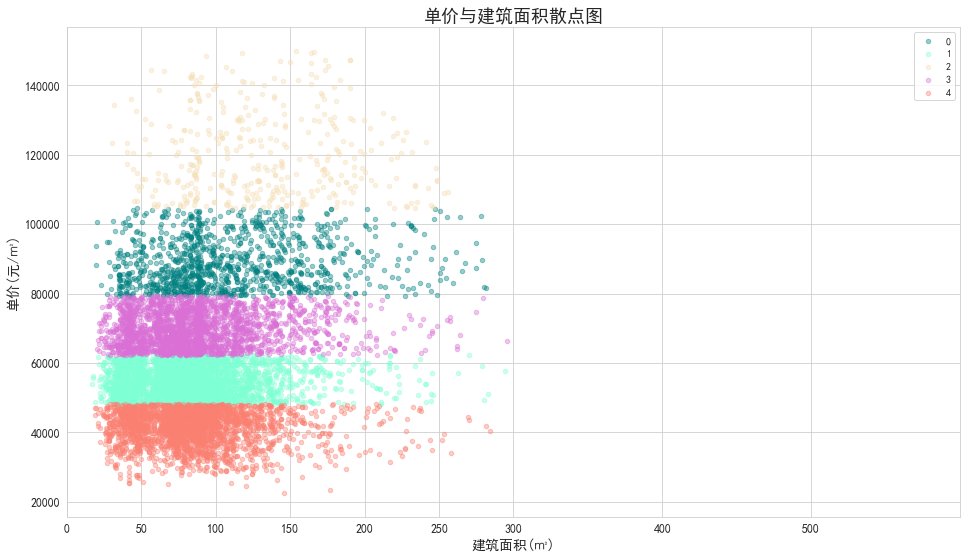

In [101]:
"""4、聚类结果：单价与建筑面积的散点图"""
colors = ['teal', 'aquamarine', 'wheat', 'orchid', 'salmon']
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax.set_title("单价与建筑面积散点图",fontsize=18)
house_cluster[0].plot(x="size", y="unitprice", kind="scatter",label="0",color=colors[0],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500],xlim=[0,600])
house_cluster[1].plot(x="size", y="unitprice", kind="scatter",label="1",color=colors[1],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500],xlim=[0,600])
house_cluster[3].plot(x="size", y="unitprice", kind="scatter",label="3",color=colors[3],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500],xlim=[0,600])
house_cluster[4].plot(x="size", y="unitprice", kind="scatter",label="4",color=colors[4],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500],xlim=[0,600])
ax.set_xlabel("建筑面积(㎡)",fontsize=14)
ax.set_ylabel("单价(元/㎡)",fontsize=14)

Text(0,0.5,'总价(元)')

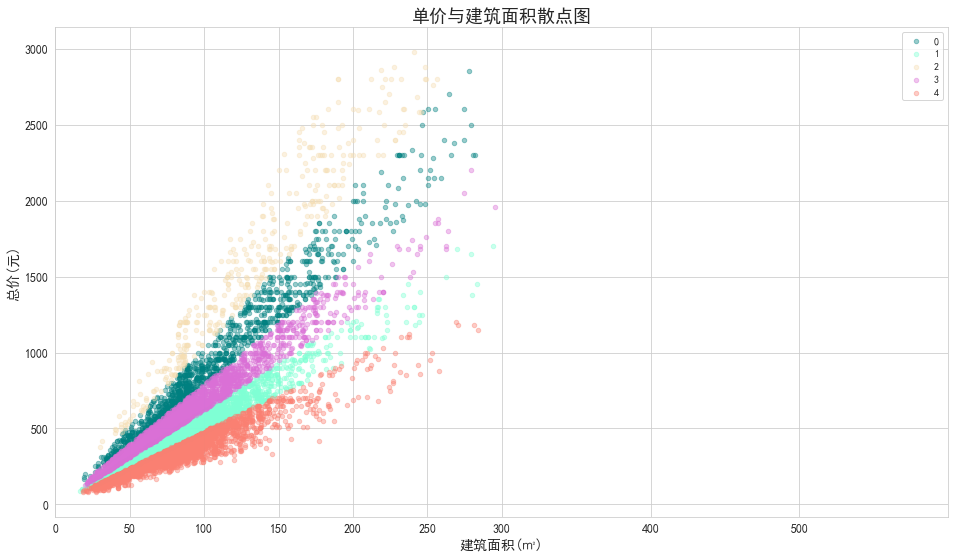

In [102]:
"""5、聚类结果：总价与建筑面积的散点图"""
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax.set_title("单价与建筑面积散点图",fontsize=18)
house_cluster[0].plot(x="size", y="totalprice", kind="scatter",label="0",color=colors[0],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500],xlim=[0,600])
house_cluster[1].plot(x="size", y="totalprice", kind="scatter",label="1",color=colors[1],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500],xlim=[0,600])
house_cluster[2].plot(x="size", y="totalprice", kind="scatter",label="2",color=colors[2],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500],xlim=[0,600])
house_cluster[3].plot(x="size", y="totalprice", kind="scatter",label="3",color=colors[3],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500],xlim=[0,600])
house_cluster[4].plot(x="size", y="totalprice", kind="scatter",label="4",color=colors[4],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500],xlim=[0,600])
ax.set_xlabel("建筑面积(㎡)",fontsize=14)
ax.set_ylabel("总价(元)",fontsize=14)

In [104]:
"""6、生成地图文件"""
count = 0
for data_map in house_cluster:
    out_map = "cluster"+str(count)+".js"
    with open(out_map,"w") as file_out:
        for lng,lat,price in zip(list(data_map["lng"]),list(data_map["lat"]),list(data_map["totalprice"])):
            #out = str(lng)+","+str(lat)
            out='{\"lng\":'+str(lng)+',\"lat\":'+str(lat)+',\"count\":'+str(price)+'},'
            file_out.write(out)
            file_out.write("\n")
    count = count + 1